In [10]:
import math 
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed('Erik Carlson')

#define our function
def f(x,a_list,m):
    f_val = 0
    
    for k in range(0,m-1):
        f_val += a_list[k] * x**k
    
    return f_val

#generate a simple range matrix from 1 to m i.e m=4 [1, 2, 3, 4]
def a_list_gen(m):
    return range(1,m+1)

#generate the value of a gaussian at a value of x
def gaussian(x,mu,sigma):
    g = 1/math.sqrt(2 *math.pi * sigma**2) * math.exp(-(x-mu)**2/(2 *sigma**2))
    return g

In [11]:
#init the number of point
n = 250000
#set the order of our polynomial
m = 4
xil = []
fil = []
for i in range(0,n):
    xi = i/n
    #generate the values of our function with an additional factor to include gaussian noise
    fi = f(xi,a_list_gen(4),m)  + + float(np.random.normal(0,0.1,1))
    xil.append(xi)
    fil.append(fi)




In [12]:
#Initalize our matrix A for the general least squares method
A = np.zeros([n,m])
for i in range(0,n):
    for j in range(0,m):
        A[i,j] = (i/n)**j
        
#create a column vector with our values of the function at f        
y = np.array(fil)[:, np.newaxis]

#find the coefficents of our polynomial to approximate our polynomial with gaussian noise
alpha = np.dot((np.dot(np.linalg.pinv(np.dot(A.T,A)),A.T)),y)


[[ 1.0001529 ]
 [ 1.9949453 ]
 [ 3.01816955]
 [-0.01439639]]


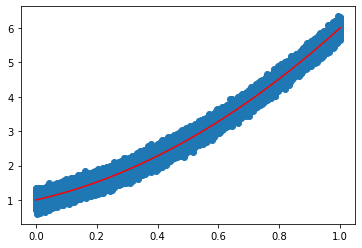

In [14]:
#our coefficents are printed below followed by a plot which shows our points with noise and the curve of best fit 
#given in alpha

print(alpha)


plt.scatter(xil,fil)
x_arr = np.array(xil)
plt.plot(xil, alpha[3]*x_arr**3 + alpha[2]*x_arr**2 + alpha[1]*x_arr + alpha[0], 'r')
plt.show()

In [15]:
#we can know approximate our error values for each value of our coefficent  
from scipy.stats import chisquare
approx =alpha[3]*x_arr**3 + alpha[2]*x_arr**2 + alpha[1]*x_arr + alpha[0]
#we use a scipy chi^2 function using our approximate values and our noisy values
chisq = chisquare(np.array(fil),approx)[0]/(n-m)

c = chisq * np.linalg.inv(np.dot(A.T,A))

In [16]:
# our error will be the diagonal of that matrix
error = np.diag(c)
print(error)

[2.79578386e-07 2.09686306e-05 1.13231763e-04 4.89276854e-05]


In [17]:
#standard error
a0 = np.arange(1,5) 
np.dot(np.dot(a0,c),a0)


2.544289964264115e-05

In [18]:
approx

array([1.0001529 , 1.00016088, 1.00016886, ..., 5.9987755 , 5.99880746,
       5.99883941])